## Objective

### The goal of the data analysis project using sql would to be identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline 

## Imporing libraries 

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## DataBase connection

In [24]:
connection = sqlite3.connect("C:\\Users\\lohar\\Desktop\\mypython\\Business Problem Project\\Airline bussiness problem\\travel.sqlite")
cursor = connection.cursor() # to execute query

In [18]:
cursor.execute('''select name from sqlite_master where type = "table" ;''') # sqlite_master is an internal table that is present in all SQLite databases
print("List of tables present in the database")
table_list = [table[0] for table in cursor.fetchall()]
print(table_list)

List of tables present in the database
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


## Data Exploration 

In [20]:
aircrafts_data = pd.read_sql('''select * from aircrafts_data''' , connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [23]:
airports_data = pd.read_sql('''select * from airports_data''' , connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [24]:
boarding_passes = pd.read_sql('''select * from boarding_passes''' , connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [25]:
bookings = pd.read_sql('''select * from bookings''' , connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [26]:
flights = pd.read_sql('''select * from flights''' , connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [27]:
seats = pd.read_sql('''select * from seats''' , connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [28]:
ticket_flights = pd.read_sql('''select * from ticket_flights''' , connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [29]:
tickets = pd.read_sql('''select * from tickets''' , connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


### fetching all columns and their types from all tables 

In [37]:
# fetching all columns and their types from all tables
for table in table_list:
    print("\ntable: " + table)
    column_info = connection.execute('''PRAGMA table_info({})'''.format(table))
    for column in column_info.fetchall():
        print(column[1:3]) # slicing because we want just column1 and column2


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

### checking is their any missing values in columns 

In [42]:
for table in table_list:
    print("\ntable: " + table)
    data = pd.read_sql_query(f'''select * from {table}''' , connection)
    print(data.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


##  Basis Analysis

### How many planes have more than 100 seats 

In [7]:
planes = pd.read_sql_query('''select aircraft_code , count(seat_no) as no_of_seats
                            from seats group by aircraft_code 
                            having count(seat_no) > 100 ;''' , connection)
planes

,aircraft_code,no_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### The number of tickets booked and total amount earned change with the time

In [11]:
booked_ticket = pd.read_sql_query('''select * from
                                     tickets inner join bookings
                                     on tickets.book_ref = bookings.book_ref ;''' , connection)
booked_ticket["book_date"] = pd.to_datetime(booked_ticket["book_date"])
booked_ticket["date"] = booked_ticket["book_date"].dt.date
booked_ticket

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [15]:
booked_ticket.groupby("date").count()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
date,,,,,,
2017-06-21,6,6,6,6,6,6
2017-06-22,12,12,12,12,12,12
2017-06-23,28,28,28,28,28,28
2017-06-24,106,106,106,106,106,106
2017-06-25,266,266,266,266,266,266
2017-06-26,499,499,499,499,499,499
2017-06-27,1028,1028,1028,1028,1028,1028
2017-06-28,1678,1678,1678,1678,1678,1678
2017-06-29,2765,2765,2765,2765,2765,2765


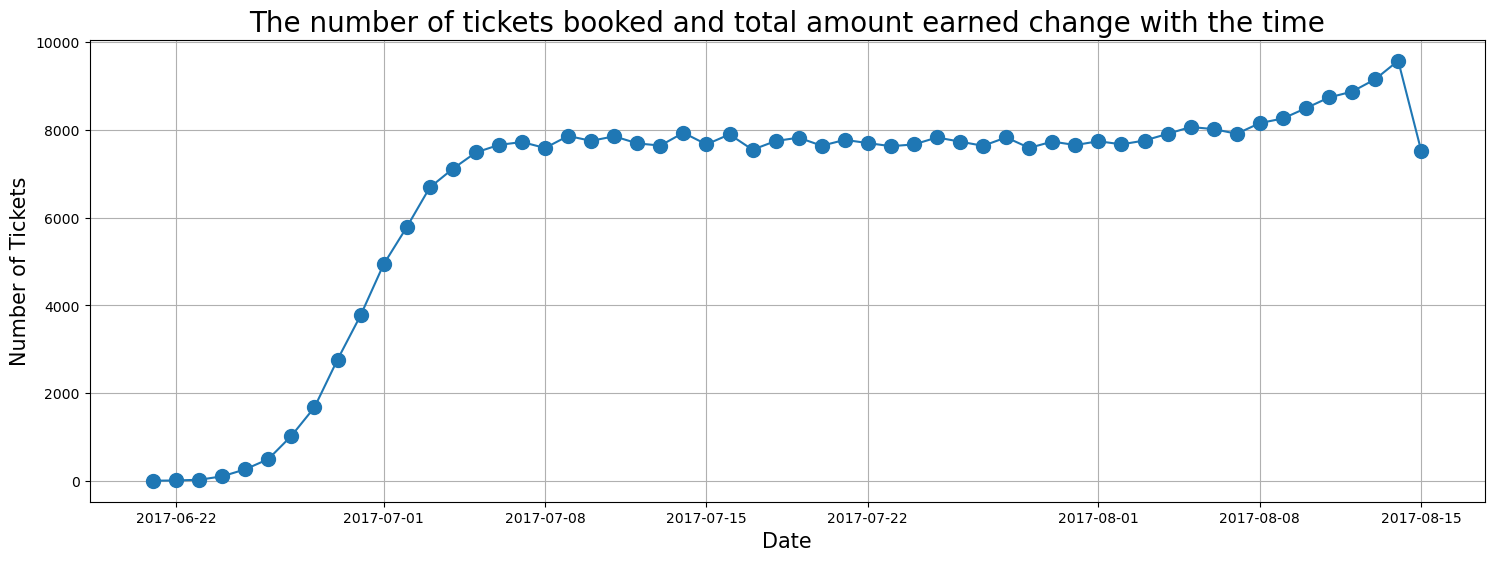

In [65]:
x = booked_ticket.groupby("date")[["ticket_no"]].count()
plt.figure(figsize = (18,6))
plt.plot(x.index , x["ticket_no"] , marker = "o" , markersize = 10)
plt.title("The number of tickets booked and total amount earned change with the time" , fontsize = 20)
plt.xlabel("Date" , fontsize = 15)
plt.ylabel("Number of Tickets" , fontsize = 15)
plt.grid("b")
plt.show()

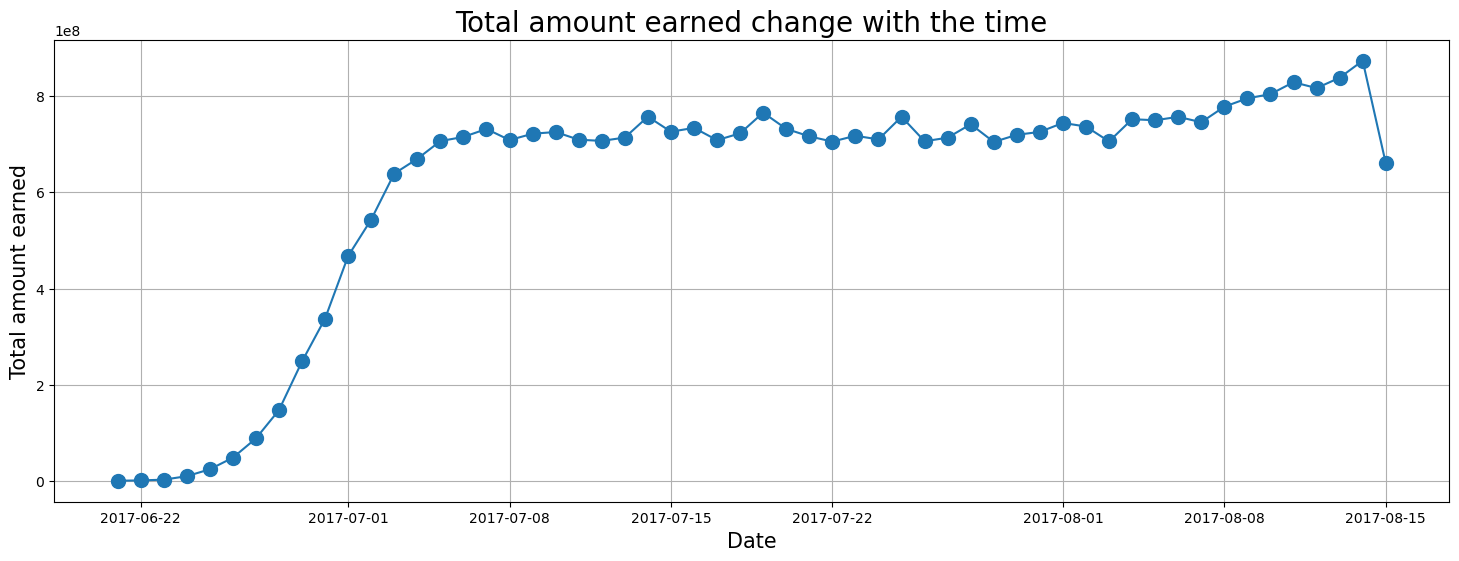

In [64]:
s = booked_ticket.groupby("date")[["total_amount"]].sum()
plt.figure(figsize = (18,6))
plt.plot(s.index , s["total_amount"] , marker = "o" , markersize = 10)
plt.title("Total amount earned change with the time" , fontsize = 20)
plt.xlabel("Date" , fontsize = 15)
plt.ylabel("Total amount earned" , fontsize = 15)
plt.grid("b")
plt.show()

### Calculate the average charges for each aircrafts with different fare conditions 

In [67]:
aircraft_charges = pd.read_sql_query('''select aircraft_code , fare_conditions , avg(amount) as average_amount from 
                                        flights inner join ticket_flights
                                        on flights.flight_id = ticket_flights.flight_id
                                        group by aircraft_code , fare_conditions ;''' , connection)
aircraft_charges

,aircraft_code,fare_conditions,average_amount
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<AxesSubplot:xlabel='aircraft_code', ylabel='average_amount'>

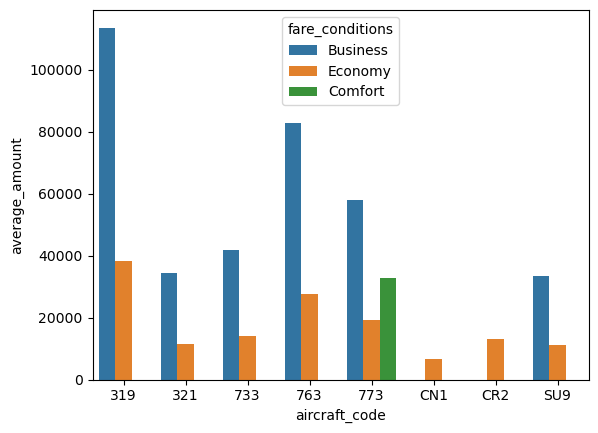

In [71]:
sns.barplot(data = aircraft_charges , x = "aircraft_code" , y = "average_amount" , hue = "fare_conditions")

## Analyzing occupancy rate 

### For each aircraft, calculate the total revenue per year and the average revenue per ticket

In [11]:
revenue_cal = pd.read_sql_query(''' select * , (total_revenue / total_no_tickets) as revenue from
                                    (select aircraft_code , 
                                    count(ticket_no) as total_no_tickets ,
                                    sum(amount) as total_revenue from 
                                    flights inner join ticket_flights
                                    on flights.flight_id = ticket_flights.flight_id
                                    group by aircraft_code) ;''' , connection)
revenue_cal

,aircraft_code,total_no_tickets,total_revenue,revenue
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


### Average occupency per aircraft 

In [59]:
occupency_rate = pd.read_sql_query(''' select a.aircraft_code , avg(total_seat_booked) as avg_occupency , b.total_seat_no ,
                                    ((avg(total_seat_booked) / b.total_seat_no)* 100)as avg_occupency_rate from
                                    (select aircraft_code , flights.flight_id , 
                                    count(boarding_passes.seat_no) as total_seat_booked
                                    from flights inner join boarding_passes
                                    on flights.flight_id = boarding_passes.flight_id
                                    group by aircraft_code , flights.flight_id) as a
                                    inner join
                                    (select aircraft_code , count(seat_no) as total_seat_no
                                    from seats group by aircraft_code) as b
                                    on a.aircraft_code = b.aircraft_code
                                    group by a.aircraft_code ;
                                    ''' , connection)
occupency_rate

,aircraft_code,avg_occupency,total_seat_no,avg_occupency_rate
0,319,53.583181,116,46.192397
1,321,88.809231,170,52.240724
2,733,80.255462,130,61.734971
3,763,113.937294,222,51.323105
4,773,264.925806,402,65.901942
5,CN1,6.004431,12,50.036928
6,CR2,21.482847,50,42.965694
7,SU9,56.812113,97,58.569188
